In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel("C:\\Users\\user\\Downloads\\Healthcare_Data_Analysis.xlsx")

In [16]:
df.head(10)

,Patient ID,Age,Gender,Diagnosis,Treatment,Outcome,Length of Stay,Readmission
0,Patient-4279,70,Other,Heart Disease,image,Deceased,9,Yes
1,Patient-1803,74,Other,Hypertension,expert,Deceased,21,Yes
2,Patient-4069,88,Male,Diabetes,news,Deteriorated,6,Yes
3,Patient-2372,15,Other,Flu,leave,Deceased,19,Yes
4,Patient-9117,8,Male,COVID-19,think,Deteriorated,9,Yes
5,Patient-1913,87,Male,COVID-19,hand,Deceased,10,Yes
6,Patient-9895,97,Male,COVID-19,begin,Improved,27,No
7,Patient-3941,3,Other,Heart Disease,course,Improved,4,No
8,Patient-5369,76,Other,Flu,season,Improved,6,No
9,Patient-0129,36,Male,Hypertension,with,Deceased,15,No


In [17]:
df.tail(10)

,Patient ID,Age,Gender,Diagnosis,Treatment,Outcome,Length of Stay,Readmission
4990,Patient-4171,94,Other,Heart Disease,too,Deceased,28,No
4991,Patient-4869,29,Female,Hypertension,same,Improved,28,Yes
4992,Patient-0353,7,Other,COVID-19,usually,Deteriorated,20,Yes
4993,Patient-2770,1,Other,Flu,also,Improved,29,No
4994,Patient-4085,90,Other,Flu,reach,Deteriorated,3,Yes
4995,Patient-7053,7,Other,COVID-19,around,Deceased,9,No
4996,Patient-6968,74,Female,Diabetes,wall,Deteriorated,28,Yes
4997,Patient-7625,33,Male,Diabetes,issue,Deceased,5,No
4998,Patient-4994,44,Female,Diabetes,move,Deceased,15,Yes
4999,Patient-7337,89,Female,Hypertension,bring,Deceased,17,No


In [21]:
df.shape

(5000, 8)

In [23]:
any(df.isna().sum()) 

False

In [25]:
any(df.duplicated())

False

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5000 non-null   int64 
 1   Gender          5000 non-null   object
 2   Diagnosis       5000 non-null   object
 3   Outcome         5000 non-null   object
 4   Length of Stay  5000 non-null   int64 
 5   Readmission     5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [27]:
df.describe(include = 'all')

,Patient ID,Age,Gender,Diagnosis,Treatment,Outcome,Length of Stay,Readmission
count,5000,5000.000000,5000,5000,5000,5000,5000.000000,5000
unique,3939,NaN,3,5,964,4,NaN,2
top,Patient-6941,NaN,Other,Hypertension,power,Recovered,NaN,Yes
freq,6,NaN,1685,1035,14,1277,NaN,2504
mean,NaN,49.989000,NaN,NaN,NaN,NaN,15.313000,NaN
std,NaN,29.015893,NaN,NaN,NaN,NaN,8.627254,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,25.000000,NaN,NaN,NaN,NaN,8.000000,NaN
50%,NaN,50.000000,NaN,NaN,NaN,NaN,15.000000,NaN
75%,NaN,75.000000,NaN,NaN,NaN,NaN,23.000000,NaN


**patient_id**
- Count: 5000 patient IDs are recorded.
- Unique: 3939 unique patients, meaning some have multiple visits.
- Most Frequent: Patient-6941 is the most common, appearing 6 times.

**age**
- Count: 5000 age values.
- Mean: Average age is 49.99 years.
- Spread: -  25% are under 25 years, 
          -  50% are 50 years or below,
          -  75% are under 75 years.

**gender**
- Count: 5000 entries.
- Unique: 3 gender categories.
- Most Frequent: "Other" is most common, with 1,685 patients.

**diagnosis**
- Count: 5000 diagnoses.
- Unique: 5 distinct diagnosis types.
- Most Frequent: "Hypertension" is most common, occurring 1,035 times.

**treatment**
- Count: 5000 treatments listed.
- Unique: 964 treatment types.
- Most Frequent: "power" appears 14 times.

**outcome**
- Count: 5000 outcome records.
- Unique: 4 different outcomes.
- Most Frequent: "Recovered" is most common, with 1,277 patients.

**length_of_stay**
- Count: 5000 values.
- Unique: Numeric values from 1 to 30 days.
- Mean: Average stay is 15.31 days.

**readmission**
- Count: 5000 records.
- Unique: 2 categories (Yes / No).
- Most Frequent: "Yes" appears 2,504 times.

In [30]:
df.drop(['Patient ID','Treatment'],axis=1,inplace=True) 

In [32]:
df.columns

Index(['Age', 'Gender', 'Diagnosis', 'Outcome', 'Length of Stay',
       'Readmission'],
      dtype='object')

In [34]:
df.isnull().sum()

Age               0
Gender            0
Diagnosis         0
Outcome           0
Length of Stay    0
Readmission       0
dtype: int64

In [60]:
df['Age'].head(10)

0    70
1    74
2    88
3    15
4     8
5    87
6    97
7     3
8    76
9    36
Name: Age, dtype: int64

In [44]:
df[df['Age'] == 0 ]

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
166,0,Female,Heart Disease,Deteriorated,13,Yes
286,0,Other,Flu,Deteriorated,29,No
363,0,Other,Diabetes,Improved,24,Yes
416,0,Male,Heart Disease,Recovered,24,No
506,0,Male,Heart Disease,Deceased,13,Yes
543,0,Female,COVID-19,Improved,8,Yes
558,0,Male,Diabetes,Improved,13,Yes
771,0,Male,Hypertension,Deteriorated,1,No
854,0,Male,COVID-19,Improved,25,No
1307,0,Female,Heart Disease,Improved,7,Yes


In [64]:
import random
df['Age'] = df['Age'].apply(lambda x : random.randint(20, 90) if x == 0 else x)

In [68]:
df[df['Age'] == 0 ]

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission


In [119]:
df.columns

Index(['Age', 'Gender', 'Diagnosis', 'Outcome', 'Length of Stay',
       'Readmission'],
      dtype='object')

In [121]:
df.nunique()

Age               100
Gender              3
Diagnosis           5
Outcome             4
Length of Stay     30
Readmission         2
dtype: int64

- There are 100 unique entries in age column.As it randomly get value.
- 3 unique genders are present(female,male,other).
- Diagnosis column have 5 unique values.
- In outcome 4 unique values are there.
- In length of stay have 30 unique values.
- There are 2 unique readmission(yes/no).

In [124]:
df[df['Length of Stay'] >= 10]

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
1,74,Other,Hypertension,Deceased,21,Yes
3,15,Other,Flu,Deceased,19,Yes
5,87,Male,COVID-19,Deceased,10,Yes
6,97,Male,COVID-19,Improved,27,No
9,36,Male,Hypertension,Deceased,15,No
...,...,...,...,...,...,...
4992,7,Other,COVID-19,Deteriorated,20,Yes
4993,1,Other,Flu,Improved,29,No
4996,74,Female,Diabetes,Deteriorated,28,Yes
4998,44,Female,Diabetes,Deceased,15,Yes


- There are total 3459 patiens who stayed more than 10 days 

In [127]:
df.sort_values(by="Length of Stay",ascending=False)

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
1353,48,Other,COVID-19,Recovered,30,Yes
442,35,Male,COVID-19,Improved,30,Yes
3643,89,Other,COVID-19,Recovered,30,Yes
4785,36,Other,Diabetes,Deteriorated,30,Yes
4786,51,Male,COVID-19,Deteriorated,30,No
...,...,...,...,...,...,...
4806,73,Other,Flu,Deceased,1,Yes
1070,60,Other,Diabetes,Recovered,1,Yes
1554,90,Female,Hypertension,Improved,1,Yes
3688,58,Female,COVID-19,Deceased,1,No


In [131]:
df[(df['Age']== 60)  & (df['Diagnosis'] == 'COVID-19')]

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
395,60,Female,COVID-19,Deceased,20,Yes
524,60,Other,COVID-19,Deceased,23,Yes
732,60,Other,COVID-19,Deteriorated,23,Yes
826,60,Male,COVID-19,Recovered,20,Yes
953,60,Other,COVID-19,Deceased,13,Yes
1913,60,Female,COVID-19,Deceased,8,No
2863,60,Female,COVID-19,Improved,8,No
2986,60,Female,COVID-19,Deceased,20,No
4074,60,Female,COVID-19,Recovered,11,No
4119,60,Other,COVID-19,Recovered,29,No


In [133]:
df[(df['Age']== 60)  & (df['Diagnosis'] == 'Hypertension')]


,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
877,60,Female,Hypertension,Deteriorated,1,No
1428,60,Male,Hypertension,Improved,17,No
1475,60,Other,Hypertension,Recovered,4,No
1621,60,Male,Hypertension,Improved,9,Yes
3308,60,Male,Hypertension,Improved,1,Yes
4080,60,Female,Hypertension,Deceased,9,No
4226,60,Female,Hypertension,Deteriorated,3,Yes
4307,60,Male,Hypertension,Deceased,22,No
4366,60,Male,Hypertension,Recovered,13,No
4645,60,Male,Hypertension,Recovered,15,No


In [135]:
df[df['Outcome'] =='Recovered']

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
10,43,Other,Diabetes,Recovered,16,Yes
11,24,Female,Heart Disease,Recovered,30,No
12,29,Male,Heart Disease,Recovered,9,No
13,91,Other,Flu,Recovered,15,Yes
14,19,Male,Flu,Recovered,30,No
...,...,...,...,...,...,...
4979,5,Male,COVID-19,Recovered,27,No
4981,61,Other,Flu,Recovered,14,Yes
4983,59,Male,Flu,Recovered,3,Yes
4988,10,Other,Flu,Recovered,29,No


In [141]:
df[(df['Outcome'] == 'Deceased') & (df['Length of Stay'] >= 20) ]

,Age,Gender,Diagnosis,Outcome,Length of Stay,Readmission
1,74,Other,Hypertension,Deceased,21,Yes
20,78,Female,Heart Disease,Deceased,23,No
30,66,Female,COVID-19,Deceased,29,No
56,21,Male,Diabetes,Deceased,24,Yes
83,20,Female,Hypertension,Deceased,24,No
...,...,...,...,...,...,...
4935,90,Female,Heart Disease,Deceased,27,Yes
4953,16,Male,Diabetes,Deceased,26,No
4962,49,Other,Diabetes,Deceased,24,No
4965,5,Female,COVID-19,Deceased,21,No


In [143]:
df['Readmission'].value_counts()

Readmission
Yes    2504
No     2496
Name: count, dtype: int64

In [145]:
df.groupby("Diagnosis")["Length of Stay"].mean() 

Diagnosis
COVID-19         15.428571
Diabetes         15.965686
Flu              15.414659
Heart Disease    14.577689
Hypertension     15.179710
Name: Length of Stay, dtype: float64

- The average length of stay for patients with COVID-19 is approximately 15.43 days.
- Patients diagnosed with Heart Disease have an average length of stay of around 14.57 days.
- The patient whose diagnosis with Diabetes have an average length of stay of around 15.96 days.
- The average length of stay for patients with FLU is approximately 15.41 days.
- Patients diagnosed with Hypertension have an average length of stay of around 15.17 days.

In [37]:
df.duplicated().sum()

33

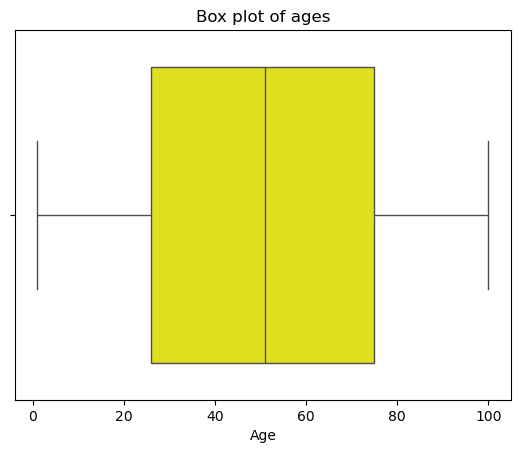

In [84]:
plt.figure()
sns.boxplot(x = df['Age'], color = 'yellow')
plt.title("Box plot of ages")
plt.show()

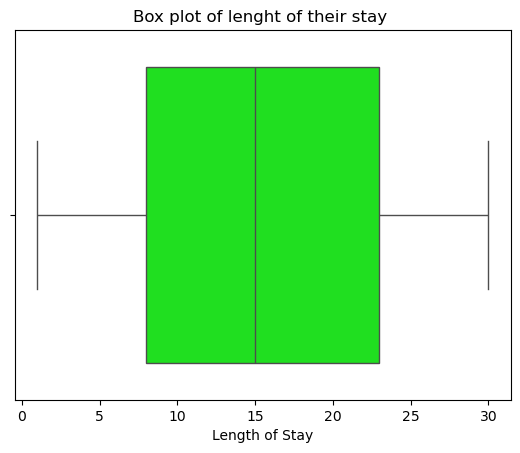

In [80]:
plt.figure()
sns.boxplot(x = df['Length of Stay'],color = 'lime')
plt.title("Box plot of lenght of their stay ")
plt.show()

- as this points shows their is no outliear in the both numerical coloums 

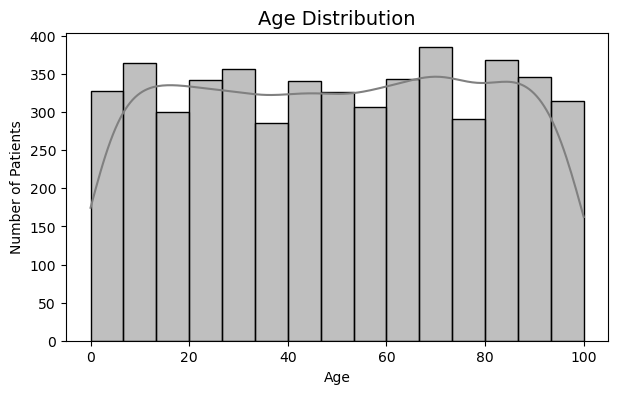

In [43]:
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=15, kde=True, color='grey', edgecolor='black')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

- The majority of patients fall between the ages of 30 to 80, with the peak around 60–70 years.
- The distribution is fairly even, indicating a balanced patient count across age groups, with slightly fewer very young and very old patients.
- The KDE curve confirms a gentle peak in middle-aged and senior groups, suggesting higher healthcare needs in those age ranges.

In [107]:
import warnings
warnings.filterwarnings('ignore')

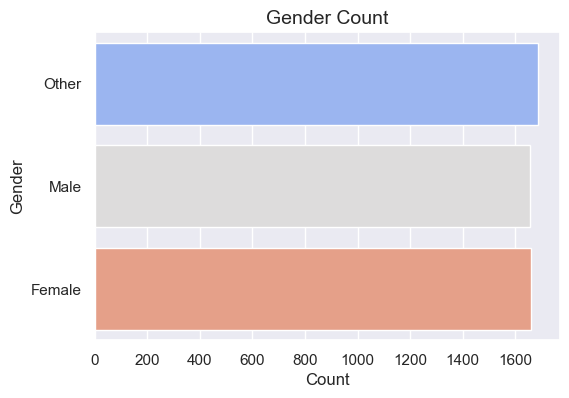

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(y='Gender', data=df, palette='coolwarm')
plt.title('Gender Count', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

- All three genders has almost same counts , Which concludes that there is no perticular gender for the illness. 

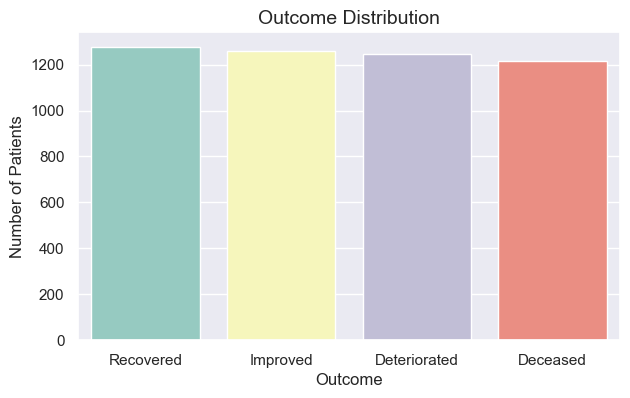

In [111]:
plt.figure(figsize=(7,4))
sns.set_style("darkgrid")
sns.countplot(x='Outcome', data=df, palette='Set3', order=df['Outcome'].value_counts().index)
plt.title('Outcome Distribution', fontsize=14)
plt.xlabel('Outcome')
plt.ylabel('Number of Patients')
plt.show()

- The most common outcomes are Recovered and Improved, each with slightly over 1200 patients.
- The Deceased category has the lowest count, but still close to the other outcomes, suggesting a significant mortality rate.
- Overall, patient outcomes are evenly distributed, with no drastic differences among the four categories.

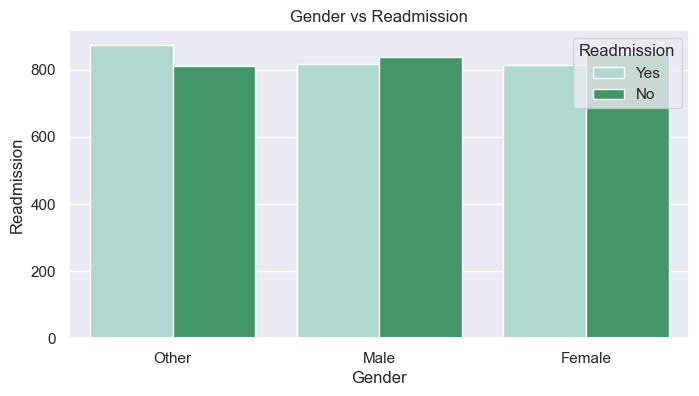

In [156]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='Gender',hue='Readmission',palette='BuGn')
plt.title("Gender vs Readmission")
plt.xlabel("Gender")
plt.ylabel("Readmission")
plt.show() 

- All gender groups (Other, Male, Female) have a comparable number of readmissions, with no drastic differences.
- The "Other" gender group has slightly more 'Yes' (readmitted) cases than 'No', unlike Male and Female groups where 'No' is slightly higher.
- Overall, readmission rates are balanced across genders, suggesting no strong gender bias in readmission likelihood.

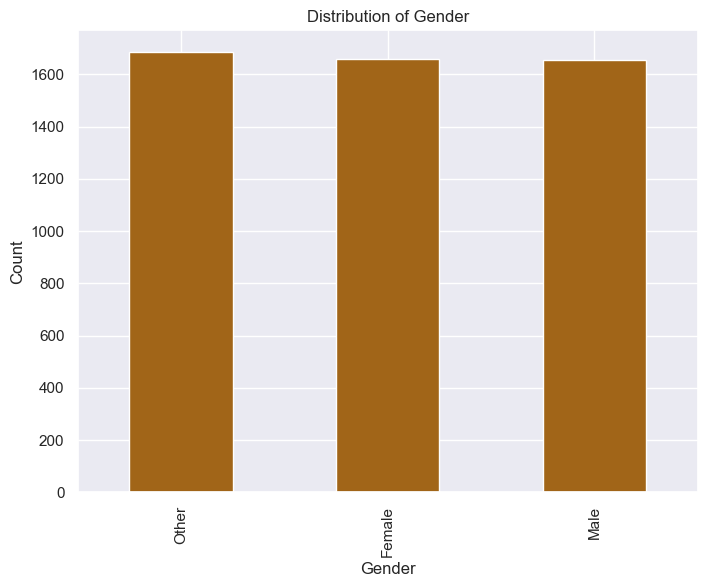

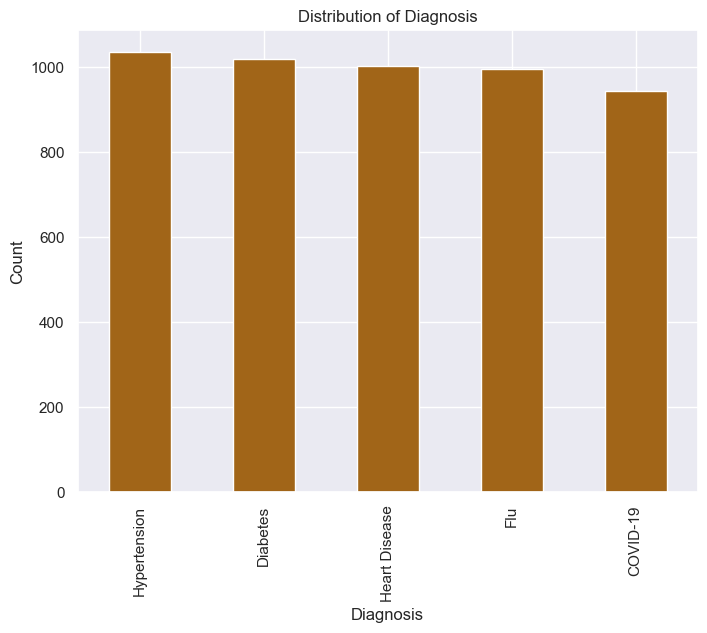

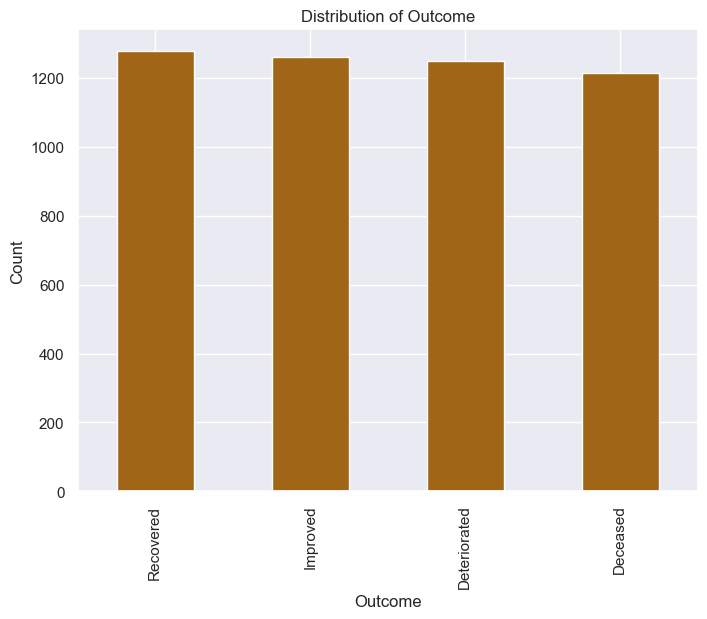

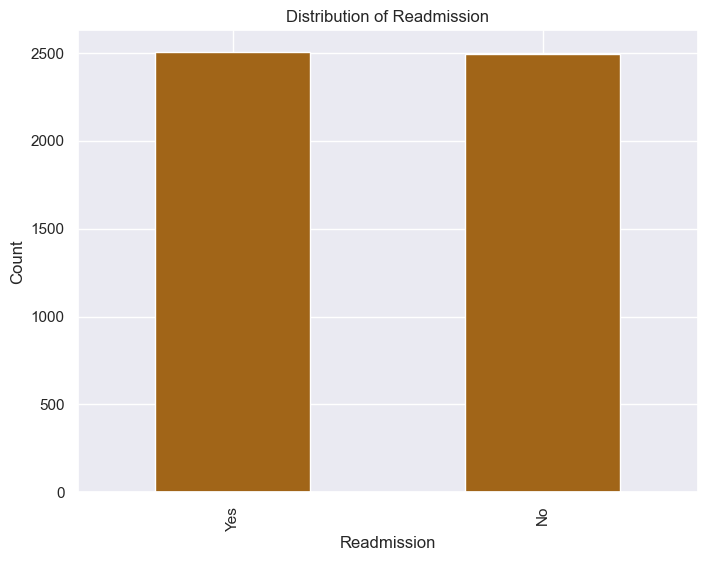

In [158]:
def uni_categorical(categorical_columns, df):
    for column in categorical_columns:
        plt.figure(figsize=(8,6))
        df[column].value_counts().head().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
categorical_columns = ['Gender', 'Diagnosis', 'Outcome', 'Readmission']
uni_categorical(categorical_columns, df)

1. **Distribution of Gender**
- The highest gender count is other is above 1600.
- The count for female and male gender category is roughly the same.
  
2. **Distribution of Diagnosis**
- The graph indicates that hypertension has the highest count, followed closely by diabetes and heart disease, which are roughly equal. Flu and COVID-19 have lower counts.
  
3. **Distribution of Outcome**
- The outcomes "Recovered," "Improved," "Deteriorated," and "Deceased" all have approximately equal counts, around 1200.
  
4. **Distribution of Readmission**
- The highest count is Readmitted patient.

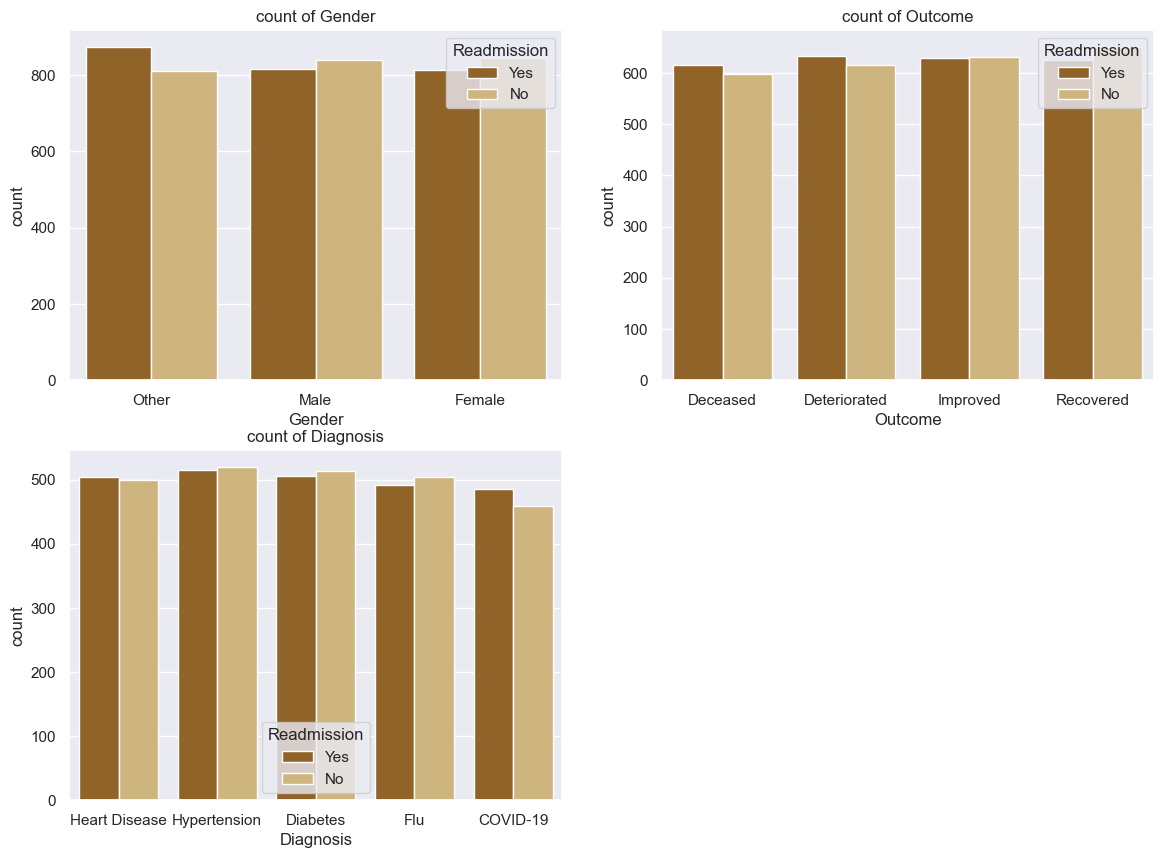

In [166]:

categorical_col=['Gender','Outcome','Diagnosis']
def bi_analysis(n):
    plt.figure(figsize=(14,10))
    for i,col in enumerate(n,1):
      plt.subplot(2,2,i)
      plt.title(f"count of {col}")
      sns.countplot(x=df[col],hue='Readmission',data=df)
    plt.show()
bi_analysis(categorical_col)

1. **Count of Gender**
- People in the "Other" gender group were readmitted to the hospital a little more often than not.
- For males, the number of people who were readmitted and not readmitted is almost the same.
- For females, fewer people were readmitted compared to those who were not, so they were readmitted less often.

2. **Count of Outcome**
- In the "Deceased" group, a few more people were readmitted than not.
- The "Deteriorated" group has the most readmitted and not readmitted patients, showing they are more likely to come back to the hospital.
- In the "Improved" and "Recovered" groups, the number of people readmitted and not readmitted is the same, so readmission doesn't seem to affect their     outcome much.


3. **Count of Diagnosis**
- For Heart Disease, more patients were readmitted than not.
- For Hypertension, more patients were not readmitted than readmitted.
- For Diabetes, more patients were not readmitted than readmitted.
- For Flu, more patients were not readmitted than readmitted.
- For COVID-19, more patients were readmitted than not.

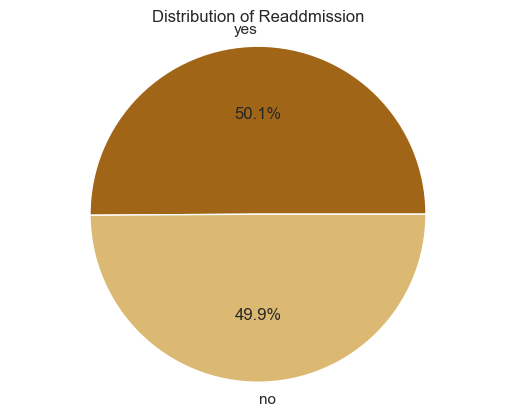

In [178]:
sizes = [50.1 , 49.9]
labels = ['yes' , 'no']
sns.set_theme(palette='BrBG')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Readdmission')
plt.axis('equal') 
plt.show()


- 50.1 % of peoples were readmitted in hospital
- 49.9 % of peoples does not readmitted 
- There is a slight difference in between them

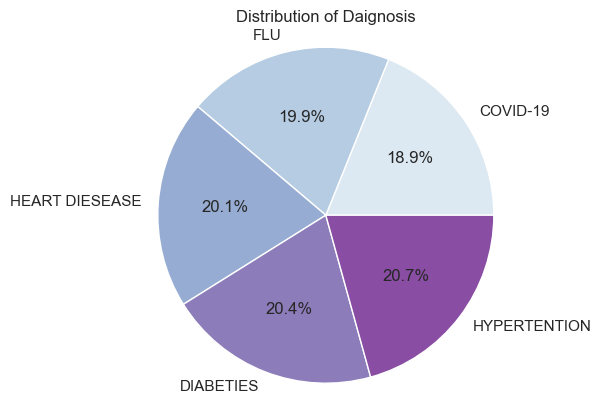

In [170]:
sizes = [18.9 , 19.9 , 20.1 , 20.4 , 20.7]
labels = ['COVID-19' , 'FLU','HEART DIESEASE' ,'DIABETIES','HYPERTENTION']
sns.set_theme(palette='BuPu')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Daignosis')
plt.axis('equal') 
plt.show()


- Hypertension is the most common condition, total percent is 20.7% .
- Diabetes is the second most prevalent condition, making up 20.4%.
- Heart Disease is closely related, representing 20.1%.
- Flu and COVID-19 are also significant, with 19.9% and 18.9%, respectively.

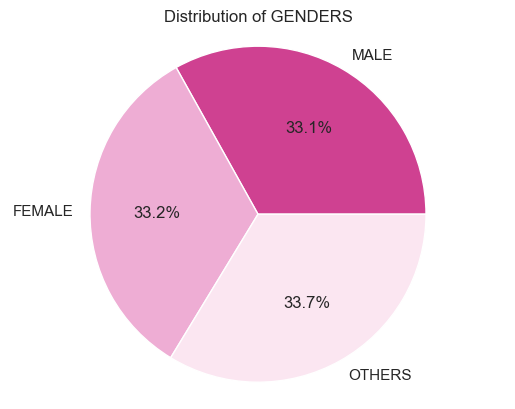

In [174]:
sizes = [33.1 , 33.2 , 33.7 ]
labels = ['MALE' , 'FEMALE','OTHERS']
sns.set_theme(palette='PiYG')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of GENDERS')
plt.axis('equal') 
plt.show()


- Male (33.1%): The male category have 33.1% patient.
- Female (33.2%): The female category is slightly higher than the male category, making up about 33.2% of the dataset, showing a near-equal distribution between males and females.
- Other (33.7%): The "Other" category, which could include non-binary individuals or those who prefer not to specify their gender, makes up the largest portion of the dataset at 33.7%.

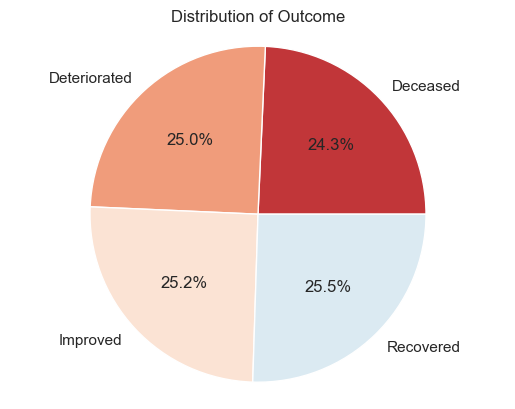

In [181]:
sizes = [24.3 , 25.0 , 25.2 , 25.5 ]
labels = ['Deceased' , 'Deteriorated','Improved', 'Recovered']
sns.set_theme(palette='RdBu')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Outcome')
plt.axis('equal') 
plt.show()


- 24.3 % of peoples are deceased 
- 25.5 % of peoples are Recovered
- 25.2 % of peoples have Improvement in there health 
- 25.0 % of peoples  got worse (deteriorated)

                    Age  Length of Stay
Age             1.00000         0.01224
Length of Stay  0.01224         1.00000


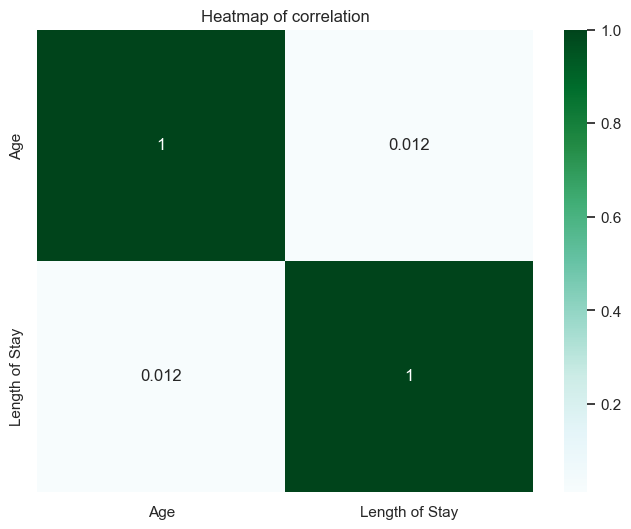

In [203]:
correlation=df[['Age','Length of Stay']].corr() 
print(correlation)
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True, cmap='BuGn')
plt.title('Heatmap of correlation')
plt.show()

- The correlation between Age and Length of Stay is 0.012, showing a very weak positive relationship.
- This indicates that Age has almost no effect on the Length of Stay.